In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [21]:
data0 = np.genfromtxt('Geneva Ionomics_Y_Spec_int.csv',delimiter = ',', skip_header = 1)
data0 = pd.DataFrame(data0)
data = data0.drop(data0.columns[0:2],axis = 1)
data.loc[189,]=np.nan #removes individual 588395, it was extremely neg and skewed the data
plt.rcParams['figure.figsize'] = (20,10)

In [22]:
data

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,91.828727,79.436022,1912.748061,5.882495,3371.070360,2574.706720,9940.165174,14466.398220,78.712800,438.453718,0.182502,0.579481,27.983088,78.413561,0.006585,4.862209,22.391683,0.413514,0.023319
1,58.206022,40.652580,1566.902969,5.856940,3544.081320,2189.611721,9653.263267,8230.550570,54.143815,236.212667,0.091406,0.244903,23.983944,54.923095,0.009040,2.714895,13.824099,0.304084,0.020963
2,63.901449,57.636087,2274.547638,6.819170,5495.366871,2614.728325,13967.897580,12394.611400,55.249662,259.690236,0.086835,0.519297,41.153569,58.575073,0.004803,2.461506,14.488620,0.401304,0.068518
3,72.839573,72.563357,1190.390687,5.091528,3078.075354,1765.972055,7978.410800,6200.788479,41.967873,319.173261,0.111687,0.236068,14.949782,70.747574,0.009075,2.569614,6.336153,0.178760,0.015922
4,66.850648,34.508112,2073.380089,8.013734,5045.403214,2840.104738,10526.677260,8710.188433,50.256052,329.646304,0.132229,0.490120,69.027882,74.561963,0.017069,2.169312,9.098213,0.101519,0.024884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,88.829881,63.892429,1094.369911,11.173872,3957.876702,1918.383518,14215.881500,4399.731258,51.046560,420.026143,0.189691,0.411849,44.357010,68.986596,0.010246,1.698399,3.394426,0.701405,0.018838
197,56.953305,55.260917,1477.073875,10.034011,3525.793628,2777.481861,13457.713190,9315.688387,54.751238,434.940937,0.169772,0.535837,25.434669,113.646892,0.008754,1.108002,10.918395,0.091572,0.035988
198,93.255139,60.947731,1158.669233,9.019439,3803.667593,1860.411610,14218.138950,3802.814671,52.854146,313.889976,0.128692,0.613659,57.423935,67.696657,0.006299,1.725266,2.937984,0.563469,0.025749
199,112.733595,117.281820,2379.646434,12.323753,3299.614437,2526.539221,11473.531010,14384.282990,74.867034,544.718940,0.196632,0.593805,38.428908,151.184022,0.016583,1.233595,19.013777,0.173881,0.078840


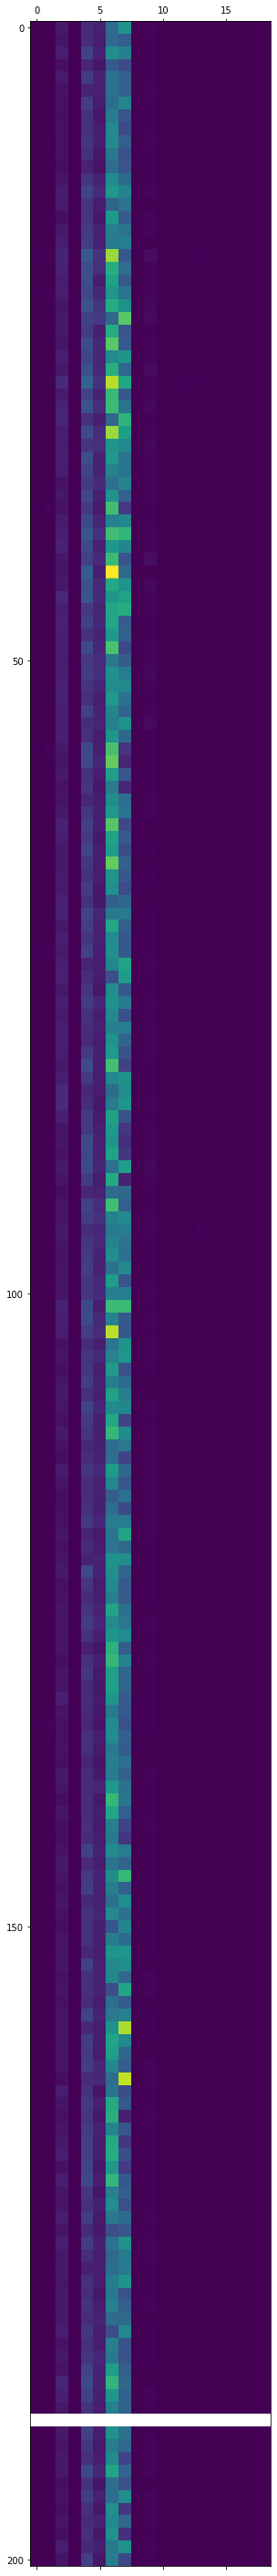

In [23]:
plt.figure(figsize=(5,50))
plt.matshow(data,fignum =1)

Whole bunch of neg conc. values in geneva data. seems sketchy but whatever

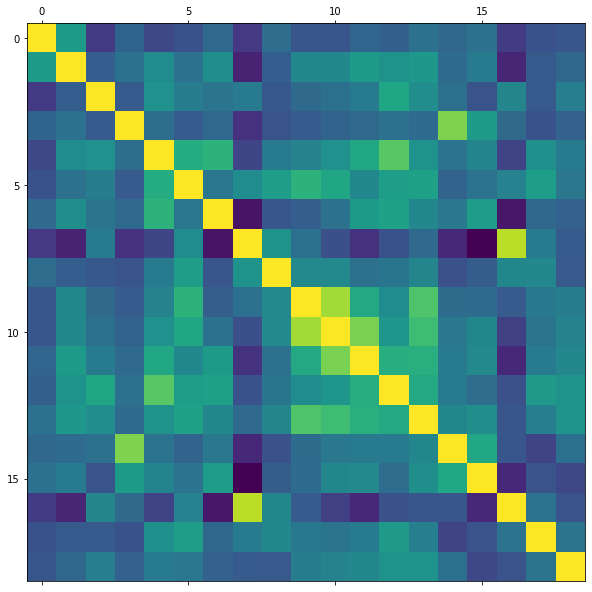

In [24]:
plt.matshow(data.corr())

In [25]:
r = pd.DataFrame(np.arange(4221).reshape(201,21))#r signifies ratio
r = r.astype('float32')
r.drop(r.columns[0:2],axis = 1, inplace = True )
r

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0
2,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0
3,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0
4,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4118.0,4119.0,4120.0,4121.0,4122.0,4123.0,4124.0,4125.0,4126.0,4127.0,4128.0,4129.0,4130.0,4131.0,4132.0,4133.0,4134.0,4135.0,4136.0
197,4139.0,4140.0,4141.0,4142.0,4143.0,4144.0,4145.0,4146.0,4147.0,4148.0,4149.0,4150.0,4151.0,4152.0,4153.0,4154.0,4155.0,4156.0,4157.0
198,4160.0,4161.0,4162.0,4163.0,4164.0,4165.0,4166.0,4167.0,4168.0,4169.0,4170.0,4171.0,4172.0,4173.0,4174.0,4175.0,4176.0,4177.0,4178.0
199,4181.0,4182.0,4183.0,4184.0,4185.0,4186.0,4187.0,4188.0,4189.0,4190.0,4191.0,4192.0,4193.0,4194.0,4195.0,4196.0,4197.0,4198.0,4199.0


In [26]:
for x in range(2,(data.shape[1]+2)):
    for y in range(data.shape[0]):
        rscore = data[x][y]/data[6][y]
        r[x][y] = rscore
        if data[x][y] < 0:
            r[x][y] = "NaN"
r

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.027240,0.023564,0.567401,0.001745,1.0,0.763765,2.948667,4.291337,0.023349,0.130064,0.000054,0.000172,0.008301,0.023261,1.953428e-06,0.001442,0.006642,0.000123,0.000007
1,0.016423,0.011471,0.442118,0.001653,1.0,0.617822,2.723770,2.322337,0.015277,0.066650,0.000026,0.000069,0.006767,0.015497,2.550703e-06,0.000766,0.003901,0.000086,0.000006
2,0.011628,0.010488,0.413903,0.001241,1.0,0.475806,2.541759,2.255466,0.010054,0.047256,0.000016,0.000094,0.007489,0.010659,8.740343e-07,0.000448,0.002637,0.000073,0.000012
3,0.023664,0.023574,0.386732,0.001654,1.0,0.573726,2.592013,2.014502,0.013634,0.103692,0.000036,0.000077,0.004857,0.022984,2.948262e-06,0.000835,0.002058,0.000058,0.000005
4,0.013250,0.006840,0.410944,0.001588,1.0,0.562909,2.086390,1.726361,0.009961,0.065336,0.000026,0.000097,0.013681,0.014778,3.383120e-06,0.000430,0.001803,0.000020,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.022444,0.016143,0.276504,0.002823,1.0,0.484700,3.591795,1.111639,0.012897,0.106124,0.000048,0.000104,0.011207,0.017430,2.588647e-06,0.000429,0.000858,0.000177,0.000005
197,0.016153,0.015673,0.418934,0.002846,1.0,0.787761,3.816932,2.642154,0.015529,0.123360,0.000048,0.000152,0.007214,0.032233,2.482765e-06,0.000314,0.003097,0.000026,0.000010
198,0.024517,0.016023,0.304619,0.002371,1.0,0.489110,3.738008,0.999776,0.013896,0.082523,0.000034,0.000161,0.015097,0.017798,1.655927e-06,0.000454,0.000772,0.000148,0.000007
199,0.034166,0.035544,0.721189,0.003735,1.0,0.765707,3.477234,4.359383,0.022690,0.165086,0.000060,0.000180,0.011646,0.045819,5.025796e-06,0.000374,0.005762,0.000053,0.000024


In [27]:
z = pd.DataFrame(np.arange(4221).reshape(201,21))
z = z.astype('float32')
z.drop(z.columns[0:2],axis = 1, inplace = True )
z

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0
2,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0
3,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0
4,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4118.0,4119.0,4120.0,4121.0,4122.0,4123.0,4124.0,4125.0,4126.0,4127.0,4128.0,4129.0,4130.0,4131.0,4132.0,4133.0,4134.0,4135.0,4136.0
197,4139.0,4140.0,4141.0,4142.0,4143.0,4144.0,4145.0,4146.0,4147.0,4148.0,4149.0,4150.0,4151.0,4152.0,4153.0,4154.0,4155.0,4156.0,4157.0
198,4160.0,4161.0,4162.0,4163.0,4164.0,4165.0,4166.0,4167.0,4168.0,4169.0,4170.0,4171.0,4172.0,4173.0,4174.0,4175.0,4176.0,4177.0,4178.0
199,4181.0,4182.0,4183.0,4184.0,4185.0,4186.0,4187.0,4188.0,4189.0,4190.0,4191.0,4192.0,4193.0,4194.0,4195.0,4196.0,4197.0,4198.0,4199.0


In [28]:
for x in range(2,(data.shape[1]+2)):
    if x != 6:
        mean = r[x].mean()
        std = r[x].std()
        for y in range(data.shape[0]):
            zscore = (r[x][y] - mean ) / std
            z[x][y] = zscore
z[6] = r[6]
z

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.409047,0.777854,1.208910,-0.180255,1.0,1.408765,-0.183519,1.790208,1.912439,1.900785,1.803761,0.056911,-0.594328,0.649060,-0.249167,2.111739,2.688261,0.557127,0.113738
1,-0.151449,-0.379912,0.261693,-0.208988,1.0,0.334237,-0.468612,0.019019,0.394877,-0.334481,-0.437319,-0.543681,-0.911823,-0.382450,-0.031436,0.396146,0.808019,0.027757,-0.151738
2,-0.843235,-0.473965,0.048367,-0.337017,1.0,-0.711378,-0.699341,-0.041134,-0.587107,-1.018087,-1.227099,-0.395309,-0.762466,-1.025269,-0.642650,-0.410823,-0.058896,-0.155684,1.583766
3,0.893119,0.778833,-0.157061,-0.208512,1.0,0.009573,-0.635635,-0.257890,0.086035,0.971230,0.392299,-0.499328,-1.307331,0.612339,0.113490,0.570612,-0.455311,-0.370372,-0.348302
4,-0.609297,-0.823264,0.025999,-0.228975,1.0,-0.070066,-1.276594,-0.517083,-0.604610,-0.380796,-0.404375,-0.379856,0.519533,-0.477972,0.272014,-0.456398,-0.630334,-0.915384,-0.412020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.717088,0.067413,-0.990454,0.155039,1.0,-0.645893,0.631749,-1.070048,-0.052517,1.056942,1.312787,-0.339449,0.007346,-0.125613,-0.017604,-0.458527,-1.278843,1.340482,-0.457697
197,-0.190418,0.022439,0.086404,0.162095,1.0,1.585435,0.917146,0.306706,0.442162,1.664479,1.330501,-0.059485,-0.819375,1.841159,-0.056202,-0.749904,0.256711,-0.831365,0.984937
198,1.016201,0.055954,-0.777889,0.014494,1.0,-0.613426,0.817097,-1.170674,0.135125,0.225028,0.198522,-0.004814,0.812603,-0.076781,-0.357619,-0.396476,-1.337294,0.922911,0.074605
199,2.408157,1.924763,2.371649,0.438557,1.0,1.423064,0.486524,1.851418,1.788386,3.135271,2.235016,0.104024,0.098272,3.646222,0.870836,-0.598703,2.084840,-0.447597,4.609510


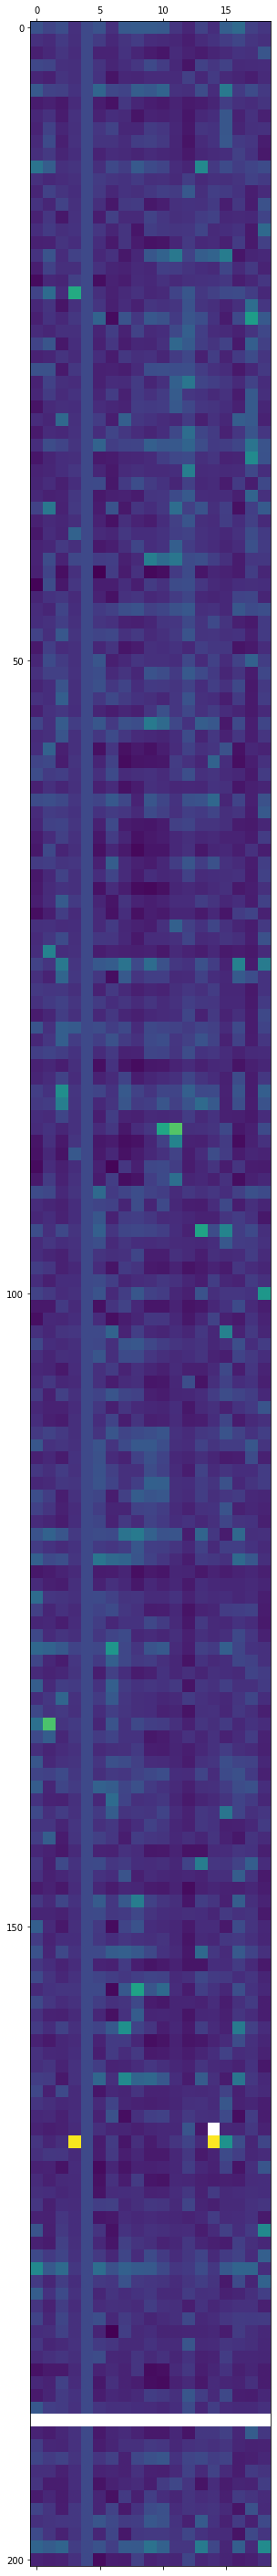

In [29]:
plt.figure(figsize=(5,50))
plt.matshow(z,fignum =1)

That indv. is pretty messed up. Remove it?

In [30]:
for x in range(2,(z.shape[1]+2)): # counts through columns
    print(x,"k: ", z[x].kurt(),"s: ", z[x].skew(),"v: ",z[x].var())
    if z[x].kurt() > 40:
        cutoff = z[x].quantile(.99)
        for y in range(z.shape[0]): #counts through rows
            if z[x][y] > cutoff:
                z[x][y] = "NaN"
z

2 k:  2.1037703 s:  1.1667075 v:  0.9999999403953552
3 k:  20.041582 s:  3.4229457 v:  1.0000003576278687
4 k:  3.5063388 s:  1.541062 v:  0.9999999403953552
5 k:  99.84719 s:  9.376002 v:  0.9999997615814209
6 k:  0 s:  0 v:  0.0
7 k:  0.30395776 s:  0.7390835 v:  1.0000003576278687
8 k:  3.0351548 s:  1.0377165 v:  0.9999995231628418
9 k:  4.589946 s:  1.6246709 v:  0.9999999403953552
10 k:  6.888912 s:  1.8309591 v:  0.9999996423721313
11 k:  1.4533974 s:  1.0141555 v:  0.9999998211860657
12 k:  6.536609 s:  1.6961932 v:  1.000000238418579
13 k:  23.48014 s:  4.0039563 v:  0.9999999403953552
14 k:  0.6555652 s:  0.8169546 v:  0.999999463558197
15 k:  9.123221 s:  2.394109 v:  0.9999997615814209
16 k:  98.29094 s:  8.627793 v:  0.9999997615814209
17 k:  6.2899733 s:  2.1581066 v:  1.0000001192092896
18 k:  1.9980888 s:  1.1664221 v:  1.0000001192092896
19 k:  6.675217 s:  2.0037029 v:  1.0
20 k:  7.5670295 s:  2.289782 v:  0.9999999403953552


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.409047,0.777854,1.208910,-0.180255,1.0,1.408765,-0.183519,1.790208,1.912439,1.900785,1.803761,0.056911,-0.594328,0.649060,-0.249167,2.111739,2.688261,0.557127,0.113738
1,-0.151449,-0.379912,0.261693,-0.208988,1.0,0.334237,-0.468612,0.019019,0.394877,-0.334481,-0.437319,-0.543681,-0.911823,-0.382450,-0.031436,0.396146,0.808019,0.027757,-0.151738
2,-0.843235,-0.473965,0.048367,-0.337017,1.0,-0.711378,-0.699341,-0.041134,-0.587107,-1.018087,-1.227099,-0.395309,-0.762466,-1.025269,-0.642650,-0.410823,-0.058896,-0.155684,1.583766
3,0.893119,0.778833,-0.157061,-0.208512,1.0,0.009573,-0.635635,-0.257890,0.086035,0.971230,0.392299,-0.499328,-1.307331,0.612339,0.113490,0.570612,-0.455311,-0.370372,-0.348302
4,-0.609297,-0.823264,0.025999,-0.228975,1.0,-0.070066,-1.276594,-0.517083,-0.604610,-0.380796,-0.404375,-0.379856,0.519533,-0.477972,0.272014,-0.456398,-0.630334,-0.915384,-0.412020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.717088,0.067413,-0.990454,0.155039,1.0,-0.645893,0.631749,-1.070048,-0.052517,1.056942,1.312787,-0.339449,0.007346,-0.125613,-0.017604,-0.458527,-1.278843,1.340482,-0.457697
197,-0.190418,0.022439,0.086404,0.162095,1.0,1.585435,0.917146,0.306706,0.442162,1.664479,1.330501,-0.059485,-0.819375,1.841159,-0.056202,-0.749904,0.256711,-0.831365,0.984937
198,1.016201,0.055954,-0.777889,0.014494,1.0,-0.613426,0.817097,-1.170674,0.135125,0.225028,0.198522,-0.004814,0.812603,-0.076781,-0.357619,-0.396476,-1.337294,0.922911,0.074605
199,2.408157,1.924763,2.371649,0.438557,1.0,1.423064,0.486524,1.851418,1.788386,3.135271,2.235016,0.104024,0.098272,3.646222,0.870836,-0.598703,2.084840,-0.447597,4.609510


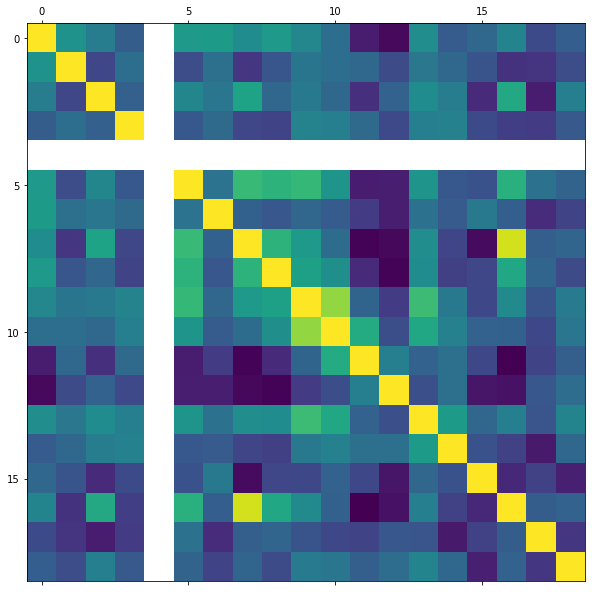

In [31]:
plt.matshow(z.corr())

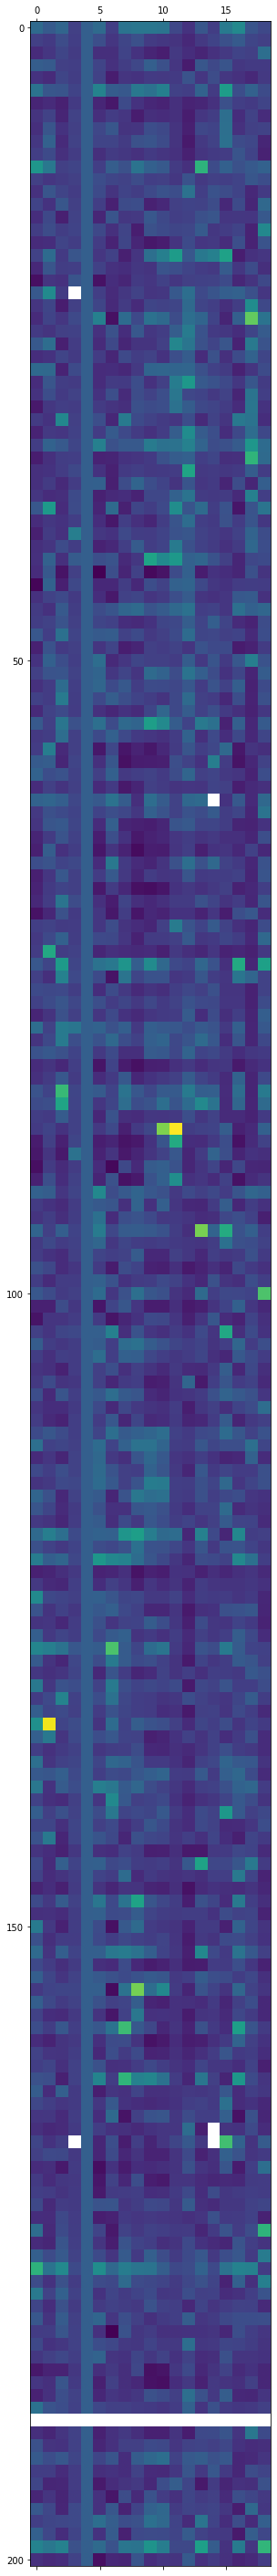

In [32]:
plt.figure(figsize=(5,50))
plt.matshow(z,fignum=1)

In [33]:
f = pd.DataFrame(np.arange(4221).reshape(201,21))
f = f.astype(str)
f[0] = data0[0]
f[1] = data0[1]
for x in range(2,(z.shape[1]+2)):
    f[x] = z[x]
f

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,318684.0,1.0,1.409047,0.777854,1.208910,-0.180255,1.0,1.408765,-0.183519,1.790208,...,1.900785,1.803761,0.056911,-0.594328,0.649060,-0.249167,2.111739,2.688261,0.557127,0.113738
1,588141.0,1.0,-0.151449,-0.379912,0.261693,-0.208988,1.0,0.334237,-0.468612,0.019019,...,-0.334481,-0.437319,-0.543681,-0.911823,-0.382450,-0.031436,0.396146,0.808019,0.027757,-0.151738
2,588646.0,1.0,-0.843235,-0.473965,0.048367,-0.337017,1.0,-0.711378,-0.699341,-0.041134,...,-1.018087,-1.227099,-0.395309,-0.762466,-1.025269,-0.642650,-0.410823,-0.058896,-0.155684,1.583766
3,588378.0,1.0,0.893119,0.778833,-0.157061,-0.208512,1.0,0.009573,-0.635635,-0.257890,...,0.971230,0.392299,-0.499328,-1.307331,0.612339,0.113490,0.570612,-0.455311,-0.370372,-0.348302
4,1583.0,1.0,-0.609297,-0.823264,0.025999,-0.228975,1.0,-0.070066,-1.276594,-0.517083,...,-0.380796,-0.404375,-0.379856,0.519533,-0.477972,0.272014,-0.456398,-0.630334,-0.915384,-0.412020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,483184.0,8.0,0.717088,0.067413,-0.990454,0.155039,1.0,-0.645893,0.631749,-1.070048,...,1.056942,1.312787,-0.339449,0.007346,-0.125613,-0.017604,-0.458527,-1.278843,1.340482,-0.457697
197,483190.0,8.0,-0.190418,0.022439,0.086404,0.162095,1.0,1.585435,0.917146,0.306706,...,1.664479,1.330501,-0.059485,-0.819375,1.841159,-0.056202,-0.749904,0.256711,-0.831365,0.984937
198,483188.0,8.0,1.016201,0.055954,-0.777889,0.014494,1.0,-0.613426,0.817097,-1.170674,...,0.225028,0.198522,-0.004814,0.812603,-0.076781,-0.357619,-0.396476,-1.337294,0.922911,0.074605
199,483187.0,8.0,2.408157,1.924763,2.371649,0.438557,1.0,1.423064,0.486524,1.851418,...,3.135271,2.235016,0.104024,0.098272,3.646222,0.870836,-0.598703,2.084840,-0.447597,4.609510


In [34]:
f.to_csv('New_ionStats_Ratio_Geneva.csv',header = ('INVO','Spec_int','B11:P31','Na23:P31','Mg26:P31','Al27:P31','P31:P31','S34:P31','K39:P31','Ca44:P31','Fe54:P31','Mn55:P31','Co59:P31','Ni60:P31','Cu63:P31',
                                      'Zn66:P31','As75:P31','Rb85:P31','Sr88:P31','Mo98:P31','Cd111:P31'))